In [72]:
import xarray
import numpy 
import matplotlib.pyplot as plt

In [118]:
chl=xarray.open_dataset("chl_2016-12.nc")
chl1=chl.chl
chl2=chl1.sel(time='2016-12-31')

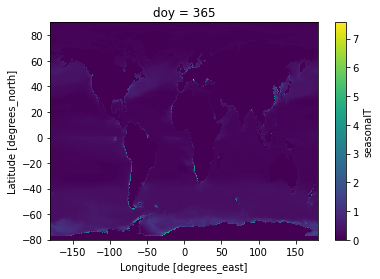

In [119]:
bl=xarray.open_dataset("CHL_baseline_1993-2020.nc")
bls=bl.seasonalT
bls1=bls.sel(doy=[365])
bls1.plot()

In [82]:
bl

<xarray.Dataset>
Dimensions:    (doy: 366, latitude: 681, longitude: 1440, p: 2)
Coordinates:
  * doy        (doy) int64 1 2 3 4 5 6 7 8 9 ... 359 360 361 362 363 364 365 366
  * latitude   (latitude) float32 -80.0 -79.75 -79.5 -79.25 ... 89.5 89.75 90.0
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * p          (p) int64 0 1
Data variables:
    seasonalT  (doy, latitude, longitude) float32 ...
    threshT    (doy, latitude, longitude) float32 ...
    linear     (p, latitude, longitude) float32 ...

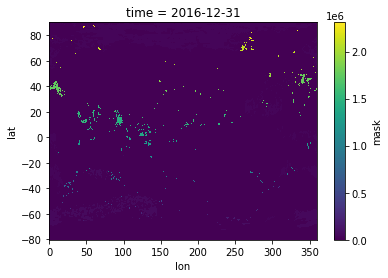

In [120]:
mask=xarray.open_dataset('MHWS_2019_mask.nc',engine='h5netcdf')
m1=mask.sel(lat=slice(-80.2, 90))
m2=m1.mask
m3=m2.sel(time=['2016-12-31'])
m3.plot()

In [85]:
m1

<xarray.Dataset>
Dimensions:  (lat: 681, lon: 1440, time: 13879)
Coordinates:
  * lat      (lat) float64 -80.12 -79.88 -79.62 -79.38 ... 89.38 89.62 89.88
  * lon      (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) datetime64[ns] 1982-01-01 1982-01-02 ... 2019-12-31
Data variables:
    mask     (lat, lon, time) int32 ...

In [86]:
m3

<xarray.DataArray 'mask' (lat: 681, lon: 1440, time: 1)>
[980640 values with dtype=int32]
Coordinates:
  * lat      (lat) float64 -80.12 -79.88 -79.62 -79.38 ... 89.38 89.62 89.88
  * lon      (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) datetime64[ns] 1999-09-27

In [87]:
blob=m3[...,0]==531

In [88]:
bls1.shape

(1, 681, 1440)

In [89]:
bls_2 = bls1.data[0,...]
bls_2.shape

(681, 1440)

In [90]:
blob.shape

(681, 1440)

In [52]:
chl2.shape

(1, 1, 681, 1440)

In [51]:
chl_2=chl2.data[0,0,...]

In [53]:
chl_2.shape

(681, 1440)

In [49]:
bb=bls_2[blob]

In [64]:
bb

array([0.2843731 , 0.28804252, 0.2858727 , ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [54]:
cb=chl_2[blob]

In [65]:
cb

array([0.21741736, 0.22825673, 0.21577322, ...,        nan,        nan,
              nan], dtype=float32)

In [55]:
h=((cb-bb)/bb)

In [61]:
h

array([-0.23545034, -0.20755889, -0.2452122 , ...,         nan,
               nan,         nan], dtype=float32)

In [68]:
h1 = h[~numpy.isnan(h)]

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        5.000e+00, 6.000e+00, 1.300e+01, 1.900e+01, 7.600e+01, 8.900e+01,
        1.530e+02, 1.960e+02, 1.230e+02, 1.220e+02, 1.450e+02, 1.560e+02,
        2.000e+02, 2.200e+02, 2.300e+02, 4.430e+02, 7.620e+02, 1.217e+03,
        1.442e+03, 7.630e+02, 4.620e+02, 2.860e+02, 1.470e+02, 1.270e+02,
        9.200e+01, 6.500e+01, 5.500e+01, 4.400e+01, 2.900e+01, 3.500e+01,
        3.200e+01, 1.800e+01, 2.400e+01, 1.300e+01, 1.800e+01, 1.000e+01,
        1.200e+01, 1.100e+01, 1.200e+01, 1.700e+01, 1.500e+01, 4.000e+00,
        1.300e+01]),
 array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
        -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
        -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
        -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
        -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
         0.02040816,  

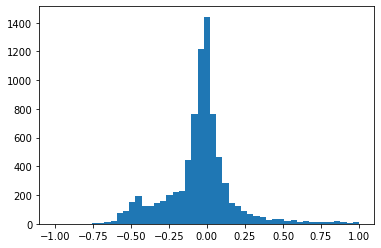

In [101]:
#2013-6-15
blob=m3[...,0]==531
bls_2 = bls1.data[0,...]
chl_2=chl2.data[0,0,...]
bb=bls_2[blob]
cb=chl_2[blob]
h=((cb-bb)/bb)
h1 = h[~numpy.isnan(h)]
plt.hist(h1, bins=np.linspace(-1,1,50))

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    8.,
          20.,   50.,   74.,  126.,  115.,  108.,  152.,  169.,  237.,
         208.,  236.,  311.,  431.,  964., 1884., 2569., 1508.,  494.,
         305.,  187.,  195.,  195.,  152.,  114.,   63.,   51.,   43.,
          46.,   49.,   34.,   23.,   25.,   18.,   25.,   15.,   22.,
          13.,    8.,   17.,   15.]),
 array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
        -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
        -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
        -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
        -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
         0.02040816,  0.06122449,  0.10204082,  0.14285714,  0.18367347,
         0.2244898 ,  0.26530612,  0.30612245,  0.34693878,  0.3877551 ,
         0.42857143,  0.46938776,  0.51020408,  0.55102041,  0.59183673,
         0.63265306,  0

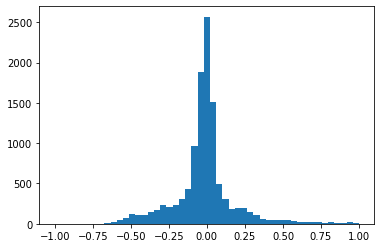

In [105]:
#2013-7-15
blob=m3[...,0]==531
bls_2 = bls1.data[0,...]
chl_2=chl2.data[0,0,...]
bb=bls_2[blob]
cb=chl_2[blob]
h=((cb-bb)/bb)
h1 = h[~numpy.isnan(h)]
plt.hist(h1, bins=np.linspace(-1,1,50))

(array([   0.,    0.,    0.,   17.,   28.,   43.,   51.,   58.,   73.,
          81.,  110.,   98.,  129.,  189.,  199.,  212.,  219.,  299.,
         397.,  529.,  868., 1709., 3206., 4226., 2884., 1345.,  743.,
         365.,  257.,  297.,  205.,  179.,  171.,  140.,  114.,  114.,
          85.,   62.,   89.,   83.,   78.,   64.,   51.,   49.,   33.,
          45.,   37.,   53.,   41.]),
 array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
        -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
        -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
        -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
        -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
         0.02040816,  0.06122449,  0.10204082,  0.14285714,  0.18367347,
         0.2244898 ,  0.26530612,  0.30612245,  0.34693878,  0.3877551 ,
         0.42857143,  0.46938776,  0.51020408,  0.55102041,  0.59183673,
         0.63265306,  0

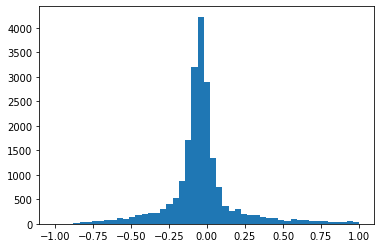

In [109]:
#2015
blob=m3[...,0]==531
bls_2 = bls1.data[0,...]
chl_2=chl2.data[0,0,...]
bb=bls_2[blob]
cb=chl_2[blob]
h=((cb-bb)/bb)
h1 = h[~numpy.isnan(h)]
plt.hist(h1, bins=np.linspace(-1,1,50))

(array([0.000e+00, 1.000e+00, 1.000e+01, 1.300e+01, 4.900e+01, 6.300e+01,
        5.800e+01, 7.000e+01, 8.000e+01, 1.440e+02, 1.950e+02, 2.260e+02,
        2.220e+02, 3.270e+02, 4.880e+02, 5.620e+02, 7.750e+02, 9.510e+02,
        1.027e+03, 1.475e+03, 2.006e+03, 2.820e+03, 2.842e+03, 3.387e+03,
        2.587e+03, 1.888e+03, 1.102e+03, 6.290e+02, 4.900e+02, 3.760e+02,
        3.520e+02, 2.440e+02, 2.320e+02, 2.680e+02, 2.220e+02, 2.210e+02,
        2.250e+02, 2.130e+02, 1.470e+02, 1.600e+02, 1.320e+02, 1.240e+02,
        8.800e+01, 9.600e+01, 9.000e+01, 6.400e+01, 7.800e+01, 5.900e+01,
        4.800e+01]),
 array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
        -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
        -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
        -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
        -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
         0.02040816,  

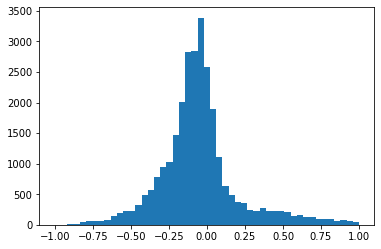

In [74]:
plt.hist(h1, bins=np.linspace(-1,1,50))

(array([   0.,    0.,    0.,   12.,   24.,   16.,   38.,   70.,   87.,
         101.,  117.,  251.,  324.,  383.,  539.,  706.,  824.,  880.,
        1105., 1128., 1379., 1642., 2185., 2905., 3134., 2368., 1727.,
        1303., 1041.,  899.,  770.,  691.,  588.,  515.,  479.,  345.,
         293.,  302.,  234.,  216.,  184.,  178.,  145.,  148.,  120.,
         123.,  101.,   85.,   80.]),
 array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
        -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
        -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
        -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
        -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
         0.02040816,  0.06122449,  0.10204082,  0.14285714,  0.18367347,
         0.2244898 ,  0.26530612,  0.30612245,  0.34693878,  0.3877551 ,
         0.42857143,  0.46938776,  0.51020408,  0.55102041,  0.59183673,
         0.63265306,  0

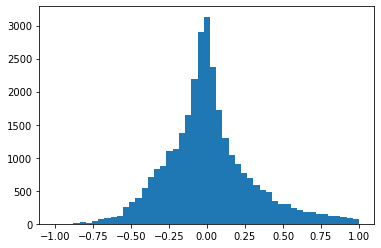

In [113]:
blob=m3[...,0]==531
bls_2 = bls1.data[0,...]
chl_2=chl2.data[0,0,...]
bb=bls_2[blob]
cb=chl_2[blob]
h=((cb-bb)/bb)
h1 = h[~numpy.isnan(h)]
plt.hist(h1, bins=np.linspace(-1,1,50))

(array([  35.,  152.,  183.,  136.,   88.,   87.,  121.,  104.,  106.,
         137.,  198.,  226.,  167.,  151.,  180.,  272.,  394.,  527.,
         728.,  867., 1336., 2518., 4844., 5942., 4329., 2732., 1942.,
        1445.,  862.,  559.,  419.,  309.,  263.,  213.,  201.,  186.,
         178.,  157.,  138.,  144.,  139.,  115.,   94.,   94.,   86.,
          96.,   99.,   79.,   92.]),
 array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
        -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
        -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
        -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
        -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
         0.02040816,  0.06122449,  0.10204082,  0.14285714,  0.18367347,
         0.2244898 ,  0.26530612,  0.30612245,  0.34693878,  0.3877551 ,
         0.42857143,  0.46938776,  0.51020408,  0.55102041,  0.59183673,
         0.63265306,  0

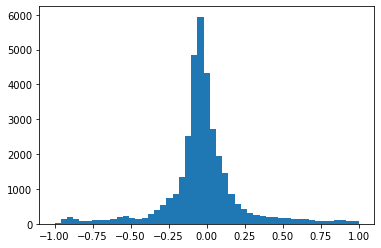

In [117]:
blob=m3[...,0]==531
bls_2 = bls1.data[0,...]
chl_2=chl2.data[0,0,...]
bb=bls_2[blob]
cb=chl_2[blob]
h=((cb-bb)/bb)
h1 = h[~numpy.isnan(h)]
plt.hist(h1, bins=np.linspace(-1,1,50))

(array([   0.,    7.,    9.,    4.,    4.,  102.,  338.,  492.,  312.,
         235.,  187.,  141.,  146.,  193.,  178.,  224.,  281.,  365.,
         438.,  654., 1073., 1730., 2340., 3159., 3002., 2370., 1163.,
         567.,  287.,  270.,  195.,  164.,  180.,  113.,   82.,   73.,
          43.,   47.,   35.,   25.,   26.,   17.,   16.,   24.,   21.,
          15.,   14.,   14.,   11.]),
 array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
        -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
        -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
        -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
        -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
         0.02040816,  0.06122449,  0.10204082,  0.14285714,  0.18367347,
         0.2244898 ,  0.26530612,  0.30612245,  0.34693878,  0.3877551 ,
         0.42857143,  0.46938776,  0.51020408,  0.55102041,  0.59183673,
         0.63265306,  0

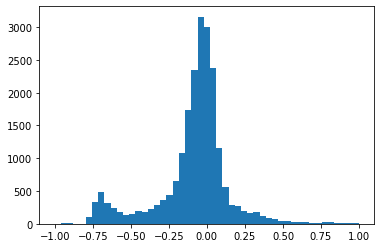

In [121]:
blob=m3[...,0]==531
bls_2 = bls1.data[0,...]
chl_2=chl2.data[0,0,...]
bb=bls_2[blob]
cb=chl_2[blob]
h=((cb-bb)/bb)
h1 = h[~numpy.isnan(h)]
plt.hist(h1, bins=np.linspace(-1,1,50))

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        13.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
        -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
        -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
        -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
        -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
         0.02040816,  0.06122449,  0.10204082,  0.14285714,  0.18367347,
         0.2244898 ,  0.26530612,  0.30612245,  0.34693878,  0.3877551 ,
         0.42857143,  0.46938776,  0.51020408,  0.55102041,  0.59183673,
         0.63265306,  0.67346939,  0.71428571,  0.75510204,  0.79591837,
         0.83673469,  0.87755102,  0.91836735,  0.95918367,  1. 

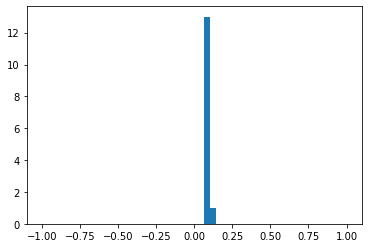

In [92]:
blob=m3[...,0]==1641151
bls_2 = bls1.data[0,...]
chl_2=chl2.data[0,0,...]
bb=bls_2[blob]
cb=chl_2[blob]
h=((cb-bb)/bb)
h1 = h[~numpy.isnan(h)]
plt.hist(h1, bins=np.linspace(-1,1,50))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
        -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
        -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
        -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
        -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
         0.02040816,  0.06122449,  0.10204082,  0.14285714,  0.18367347,
         0.2244898 ,  0.26530612,  0.30612245,  0.34693878,  0.3877551 ,
         0.42857143,  0.46938776,  0.51020408,  0.55102041,  0.59183673,
         0.63265306,  0.67346939,  0.71428571,  0.75510204,  0.79591837,
         0.83673469,  0.87755102,  0.91836735,  0.95918367,  1.        ]),
 <BarContainer object of 49 artists>)

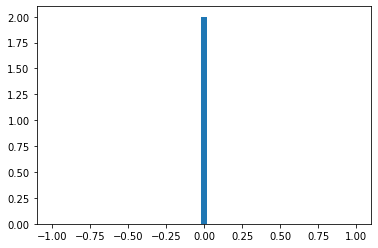

In [93]:
blob=m3[...,0]==1664851
bls_2 = bls1.data[0,...]
chl_2=chl2.data[0,0,...]
bb=bls_2[blob]
cb=chl_2[blob]
h=((cb-bb)/bb)
h1 = h[~numpy.isnan(h)]
plt.hist(h1, bins=np.linspace(-1,1,50))

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         6.,  4.,  8.,  2.,  0.,  0.,  3.,  1., 10., 12., 19., 63., 22.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
        -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
        -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
        -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
        -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
         0.02040816,  0.06122449,  0.10204082,  0.14285714,  0.18367347,
         0.2244898 ,  0.26530612,  0.30612245,  0.34693878,  0.3877551 ,
         0.42857143,  0.46938776,  0.51020408,  0.55102041,  0.59183673,
         0.63265306,  0.67346939,  0.71428571,  0.75510204,  0.79591837,
         0.83673469,  0.87755102,  0.91836735,  0.95918367,  1. 

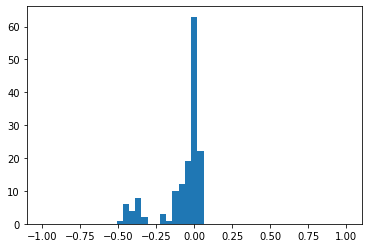

In [94]:
blob=m3[...,0]==1751185
bls_2 = bls1.data[0,...]
chl_2=chl2.data[0,0,...]
bb=bls_2[blob]
cb=chl_2[blob]
h=((cb-bb)/bb)
h1 = h[~numpy.isnan(h)]
plt.hist(h1, bins=np.linspace(-1,1,50))